In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
c = np.zeros((100,1))
t = 0.01
steps = 13000

def rec(x,n, dtau):
    xi = np.random.normal(loc=0.0, scale=1.0, size=(100,1))
    if n == 0:
        return x
    else:
        return (1 - dtau)*rec(x,n - 1, dtau) + np.sqrt(2*dtau)*xi

for i in range(int(steps/10)):
    k = rec(np.array([c[:,-1]]).T, 10, 0.01)
    c = np.append(c, k, axis = 1)

In [14]:
cols = ['Measurement_N{}'.format(i) for i in range(100)]
df = pd.DataFrame(c.T, columns = cols)

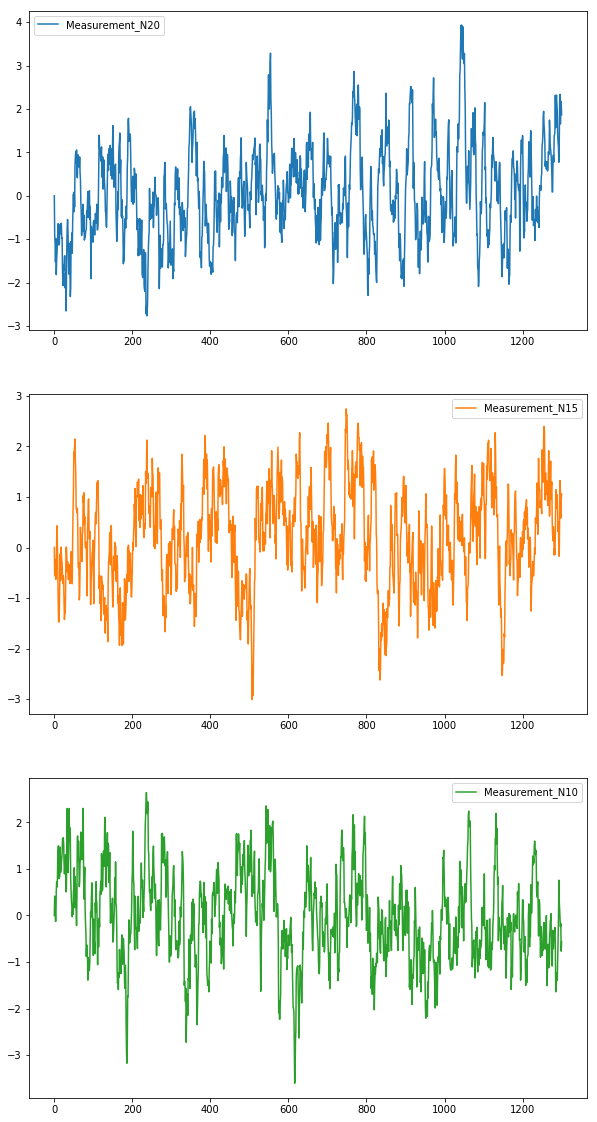

In [16]:
df[['Measurement_N20','Measurement_N15','Measurement_N10']].plot(subplots = True, figsize = (10,20), sharex = False)
plt.show()

In [17]:
emp_mean = [c[i,:].mean() for i in range(100)]
emp_std = [c[i,:].std()**2 for i in range(100)]

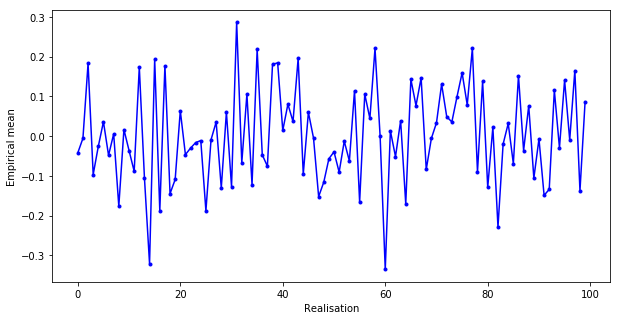

In [18]:
fig_mean = plt.figure(figsize = (10,5))
plt.plot(range(100), emp_mean, '.-b')
plt.xlabel('Realisation')
plt.ylabel('Empirical mean')
plt.show()

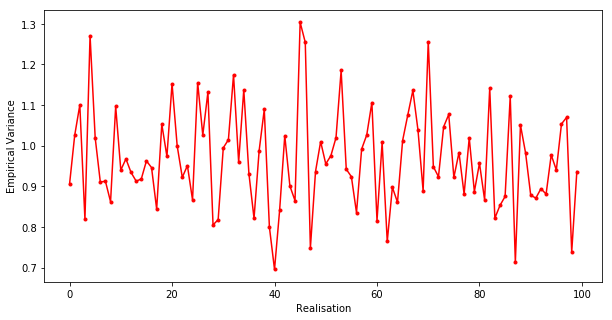

In [19]:
fig_std = plt.figure(figsize = (10,5))
plt.plot(range(100), emp_std, '.-r')
plt.xlabel('Realisation')
plt.ylabel('Empirical Variance')
plt.show()

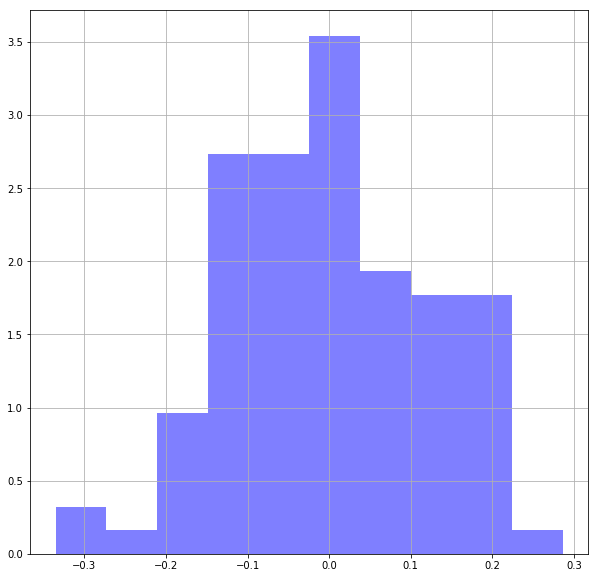

In [20]:
plt.figure(figsize = (10,10))
plt.hist(emp_mean, 10, density=True, facecolor='b', alpha=0.5)
plt.grid()
plt.show()

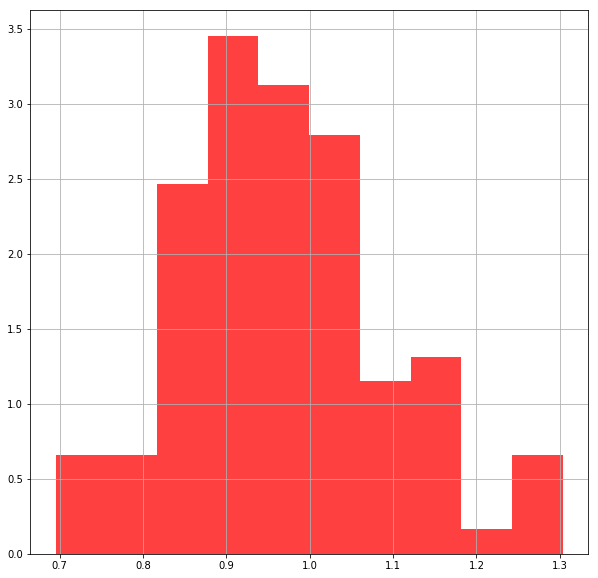

In [21]:
plt.figure(figsize = (10,10))
plt.hist(emp_std, 10, density=True, facecolor='r', alpha=0.75)
plt.grid()
plt.show()